In [2]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

# 1.1 Create Dataset

In [3]:
X = np.arange(0,100,0.25,dtype=np.float32)
Y = np.sqrt(4*0.5*X+3)

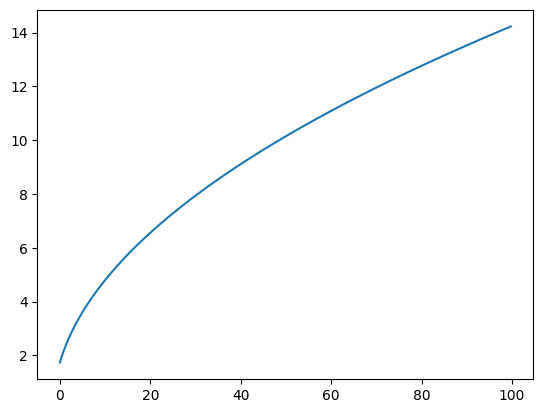

In [4]:
plt.plot(X,Y)

In [5]:
X = torch.from_numpy(X).unsqueeze(dim=1)
Y = torch.from_numpy(Y)

In [6]:
type(X),type(Y)

(torch.Tensor, torch.Tensor)

# 1.2 Build model

In [7]:
class PolynomialRegressionModel(nn.Module):
  def __init__(self,input,hidden_inputs,output):
    super().__init__()
    self.layer1 = nn.Linear(input,hidden_inputs)
    self.layer2 = nn.ReLU()
    self.layer3 = nn.Linear(hidden_inputs,output)

  def forward(self, x:torch.Tensor) -> torch.Tensor():
    return self.layer3(self.layer2(self.layer1(x)))

In [8]:
model = PolynomialRegressionModel(1,10,1)

In [9]:
for key, value in model.state_dict().items():
    print(f"Parameter: {key}, Data Type: {value.dtype}")

Parameter: layer1.weight, Data Type: torch.float32
Parameter: layer1.bias, Data Type: torch.float32
Parameter: layer3.weight, Data Type: torch.float32
Parameter: layer3.bias, Data Type: torch.float32


# 1.3 Setup optimizer and loss fucntion

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

# 1.4 Train & test loop

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [12]:
epochs = 2001

for epoch in range(epochs):

  # move model to train mode
  model.train()

  # forward pass
  pred_train = model(X_train)

  # calculate the loss
  loss_train = loss_fn(pred_train,Y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backwards
  loss_train.backward()

  # optimizer step
  optimizer.step()

  if epoch%50 == 0:

    model.eval()
    with torch.inference_mode():
      pred_test = model(X_test)

      loss_test = loss_fn(pred_test,Y_test)

      print(f"epoch:{epoch}   loss_train:{loss_train}   loss_test:{loss_test}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([280])) that is different to the input size (torch.Size([280, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([120])) that is different to the input size (torch.Size([120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


epoch:0   loss_train:11.36298942565918   loss_test:10.2700834274292
epoch:50   loss_train:4.570877552032471   loss_test:4.676517009735107
epoch:100   loss_train:3.290804624557495   loss_test:3.368399143218994
epoch:150   loss_train:2.6463537216186523   loss_test:2.829921245574951
epoch:200   loss_train:2.6380398273468018   loss_test:2.827793598175049
epoch:250   loss_train:2.638395309448242   loss_test:2.8275303840637207
epoch:300   loss_train:2.638066291809082   loss_test:2.8276171684265137
epoch:350   loss_train:2.638038158416748   loss_test:2.8275246620178223
epoch:400   loss_train:2.6386449337005615   loss_test:2.8275129795074463
epoch:450   loss_train:2.6380467414855957   loss_test:2.8278486728668213
epoch:500   loss_train:2.6384475231170654   loss_test:2.829983949661255
epoch:550   loss_train:2.6388673782348633   loss_test:2.8278965950012207
epoch:600   loss_train:2.6380486488342285   loss_test:2.8275210857391357
epoch:650   loss_train:2.6380045413970947   loss_test:2.82750821113

In [13]:
model.eval()
with torch.inference_mode():
  Y_pred = model(X_test)

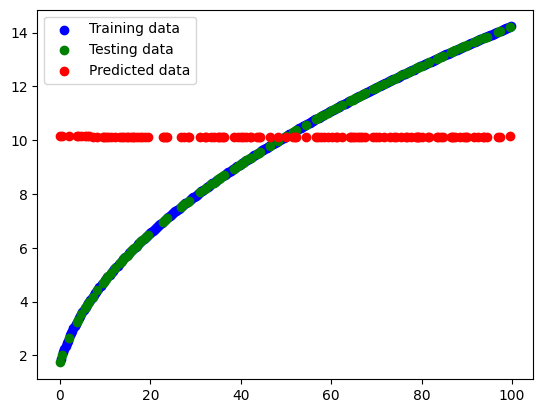

In [14]:
plt.scatter(X_train.squeeze(dim=1),Y_train,c="b",label="Training data")
plt.scatter(X_test.squeeze(dim=1),Y_test,c="g",label="Testing data")
plt.scatter(X_test.squeeze(dim=1),Y_pred,c="r",label="Predicted data")
plt.legend()

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate X and Y values
X = np.arange(0, 100, 0.25, dtype=np.float32)
Y = np.sqrt(4 * 0.5 * X + 3)

# Convert X and Y to PyTorch tensors
X_tensor = torch.tensor(X).unsqueeze(1)  # Add an extra dimension for input
Y_tensor = torch.tensor(Y).unsqueeze(1)

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc = nn.Linear(1, 1)  # Single input feature and single output

    def forward(self, x):
        return self.fc(x)

# Instantiate the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train,X_test,Y_train,Y_test = train_test_split(X_tensor,Y_tensor,test_size=0.3)
# Training the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.inference_mode():
  predicted_values = model(X_test)


Epoch [100/1000], Loss: 3.8919
Epoch [200/1000], Loss: 3.5801
Epoch [300/1000], Loss: 3.2798
Epoch [400/1000], Loss: 2.9532
Epoch [500/1000], Loss: 2.6193
Epoch [600/1000], Loss: 2.2924
Epoch [700/1000], Loss: 1.9829
Epoch [800/1000], Loss: 1.6979
Epoch [900/1000], Loss: 1.4420
Epoch [1000/1000], Loss: 1.2175


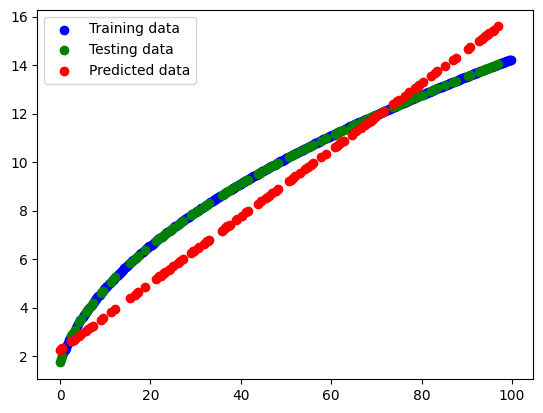

In [16]:
plt.scatter(X_train.squeeze(dim=1),Y_train,c="b",label="Training data")
plt.scatter(X_test.squeeze(dim=1),Y_test,c="g",label="Testing data")
plt.scatter(X_test.squeeze(dim=1),predicted_values,c="r",label="Predicted data")
plt.legend()

# 2 Creating a Non_linear Model

In [17]:
from sklearn.datasets import make_circles

In [18]:
data,target = make_circles(n_samples=1500,noise = 0.05)
X_filtered = data[target != 1]
import pandas as pd
df = pd.DataFrame(X_filtered,columns=["x1","x2"])
df["y"] = (df["x1"]**2 + df["x2"]**2)**0.5
X = torch.from_numpy(df[['x1', 'x2']].values).float()
Y = torch.from_numpy(df['y'].values).float().unsqueeze(1)

In [19]:
class CircularModel(nn.Module):
  def __init__(self,input=2,hidden=10,output=1):
    super(CircularModel,self).__init__()
    self.l1 = nn.Linear(input,hidden)
    self.l2 = nn.ReLU()
    self.l3 = nn.Linear(hidden,output)

  def forward(self,x:torch.Tensor):
    return self.l3(self.l2(self.l1(x)))

In [20]:
model_circle = CircularModel(input=2,hidden=10,output=1)

In [21]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_circle.parameters(),lr=0.01)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [23]:
torch.manual_seed(42)

epochs = 501

for epoch in range(epochs):

  model_circle.train()

  pred_train = model_circle(X_train)

  loss_train = loss_fn(pred_train,Y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()

  if epoch%50 ==0:
    print(f"epoch: {epoch} loss_train{loss_train}")

epoch: 0 loss_train2.005573272705078
epoch: 50 loss_train0.010870338417589664
epoch: 100 loss_train0.005339513067156076
epoch: 150 loss_train0.004958084784448147
epoch: 200 loss_train0.004741192329674959
epoch: 250 loss_train0.004591538570821285
epoch: 300 loss_train0.004473065957427025
epoch: 350 loss_train0.004370781127363443
epoch: 400 loss_train0.00427814107388258
epoch: 450 loss_train0.0041916449554264545
epoch: 500 loss_train0.004109974484890699


In [24]:
model_circle.eval()
with torch.inference_mode():
  predicted_values = model_circle(X_test)

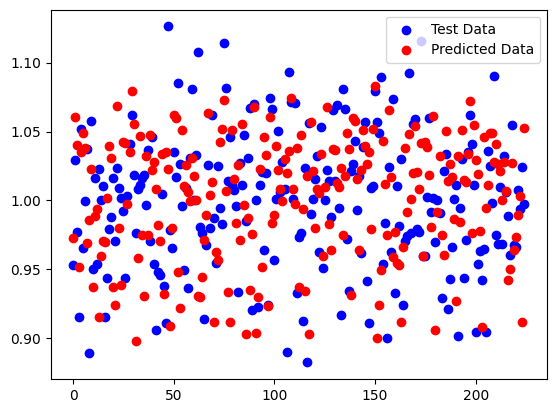

In [25]:
plt.scatter(range(len(Y_test)),Y_test, c="b", label= "Test Data")
plt.scatter(range(len(predicted_values)),predicted_values, c="r", label= "Predicted Data")
plt.legend()
plt.show()

In [26]:
torch.save(obj=model_circle.state_dict(),f="/content/drive/MyDrive/models/PolynomialRegressionNeuralNetwork_circle_model.pth")

In [27]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split

# Generate data and filter out target values not equal to 1
data, target = make_circles(n_samples=1500, noise=0.05)
X_filtered = data[target != 1]

# Create a DataFrame with columns 'x1' and 'x2'
df = pd.DataFrame(X_filtered, columns=["x1", "x2"])

# Calculate target values based on distance from origin
df['y'] = (df['x1']**2 + df['x2']**2) ** 0.5

# Convert DataFrame to PyTorch Tensors
X = torch.from_numpy(df[['x1', 'x2']].values).float()
Y = torch.from_numpy(df['y'].values).float().unsqueeze(1)

# Define the neural network model
class CircularModel(nn.Module):
    def __init__(self, input=2, hidden=10, output=1):
        super(CircularModel, self).__init__()
        self.l1 = nn.Linear(input, hidden)
        self.l2 = nn.Tanh()
        self.l3 = nn.Linear(hidden, output)

    def forward(self, x):
        return self.l3(self.l2(self.l1(x)))

model_circle = CircularModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.01)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

torch.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
    optimizer.zero_grad()

    pred_train = model_circle(X_train)
    loss_train = loss_fn(pred_train, Y_train)

    loss_train.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_train.item()}")


Epoch: 0, Loss: 1.2065192461013794
Epoch: 50, Loss: 0.016086384654045105
Epoch: 100, Loss: 0.005061399191617966
Epoch: 150, Loss: 0.004620408173650503
Epoch: 200, Loss: 0.004471896216273308
Epoch: 250, Loss: 0.004397576674818993
Epoch: 300, Loss: 0.004348870366811752
Epoch: 350, Loss: 0.004309542011469603
Epoch: 400, Loss: 0.004274038132280111
Epoch: 450, Loss: 0.00424042996019125
Epoch: 500, Loss: 0.00420802878215909
Epoch: 550, Loss: 0.004176577553153038
Epoch: 600, Loss: 0.004145968239754438
Epoch: 650, Loss: 0.0041161468252539635
Epoch: 700, Loss: 0.004087075125426054
Epoch: 750, Loss: 0.004058726131916046
Epoch: 800, Loss: 0.004031072836369276
Epoch: 850, Loss: 0.004004091955721378
Epoch: 900, Loss: 0.003977761138230562
Epoch: 950, Loss: 0.003952058497816324
Epoch: 1000, Loss: 0.003926964942365885


In [28]:
model_circle.eval()
with torch.inference_mode():
  predicted_values = model_circle(X_test)

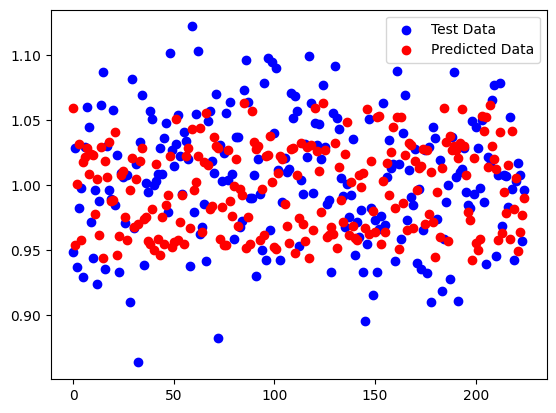

In [29]:
plt.scatter(range(len(Y_test)),Y_test, c="b", label= "Test Data")
plt.scatter(range(len(predicted_values)),predicted_values, c="r", label= "Predicted Data")
plt.legend()
plt.show()

In [30]:
X = torch.arange(-2,2,0.01).unsqueeze(dim=1)
Y = 4*X**2 + 2
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [31]:
class ParabolaRegression(nn.Module):
  def __init__(self,input=1,hidden=10,output=1):
    super().__init__()
    self.l1 = nn.Linear(input,hidden)
    self.l2 = nn.ReLU()
    self.l3 = nn.Linear(hidden,output)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.l3(self.l2(self.l1(x)))

In [32]:
model_parabola = ParabolaRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_parabola.parameters(),lr=0.01)

In [33]:
torch.manual_seed(42)

epochs = 501
for epoch in range(epochs):
  model_parabola.train()

  pred_train = model_parabola(X_train)

  loss_train = loss_fn(pred_train,Y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()


  if epoch%50 == 0:
    print(f"epoch:{epoch} loss_train{loss_train}")


epoch:0 loss_train75.84980773925781
epoch:50 loss_train4.039742469787598
epoch:100 loss_train1.829576849937439
epoch:150 loss_train1.2434989213943481
epoch:200 loss_train0.9742199778556824
epoch:250 loss_train0.7957401275634766
epoch:300 loss_train0.6519028544425964
epoch:350 loss_train0.5303835272789001
epoch:400 loss_train0.434287428855896
epoch:450 loss_train0.3596038818359375
epoch:500 loss_train0.30175653100013733


In [34]:
model_parabola.eval()
with torch.inference_mode():
  predicted_values = model_parabola(X_test)

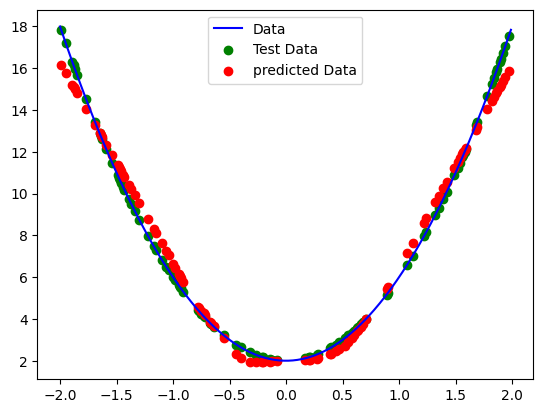

In [35]:
plt.plot(X,Y,c="b",label="Data")
plt.scatter(X_test,Y_test,c="g",label="Test Data")
plt.scatter(X_test,predicted_values,c="r",label="predicted Data")
plt.legend()

In [36]:
torch.save(obj=model_parabola.state_dict(),f="/content/drive/MyDrive/models/PolynomialRegressionNeuralNetwork_parabola_model.pth")

# 4. Hyperbola Model

In [37]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
X1 = torch.arange(-100,0,0.5).unsqueeze(dim=1)
X2 = torch.arange(0.5,100,0.5).unsqueeze(dim=1)
#X =  torch.arange(-100,100,0.5).unsqueeze(dim=1)
X = torch.cat((X1,X2),dim=0)
Y = X**(-1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)


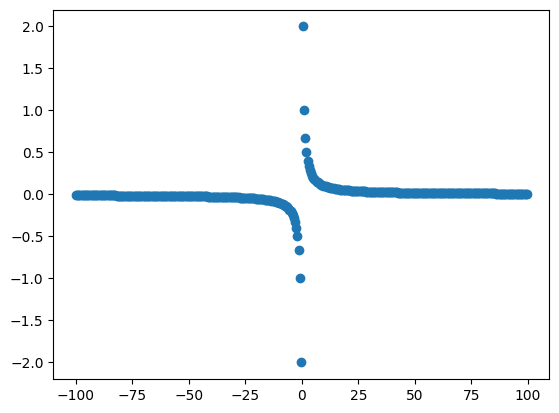

In [39]:
plt.scatter(X,Y)

In [40]:
class HyperBolaRegression(nn.Module):
  def __init__(self,input=1,hidden=10,output=1):
    super().__init__()
    self.l1 = nn.Linear(input,hidden)
    self.l2 = nn.Tanh()
    self.l3 = nn.Linear(hidden,output)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.l3(self.l2(self.l1(x)))

In [41]:
model_hb = HyperBolaRegression(1,10,1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_hb.parameters(),lr=0.01)

In [42]:
torch.manual_seed(42)

epochs = 1001
for epoch in range(epochs):
  model_hb.train()

  pred_train = model_hb(X_train)

  loss_train = loss_fn(pred_train,Y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()


  if epoch%50 == 0:
    print(f"epoch:{epoch} loss_train{loss_train}")

epoch:0 loss_train0.32145780324935913
epoch:50 loss_train0.04409981518983841
epoch:100 loss_train0.03412200137972832
epoch:150 loss_train0.03225046768784523
epoch:200 loss_train0.03147784620523453
epoch:250 loss_train0.03087189607322216
epoch:300 loss_train0.030305933207273483
epoch:350 loss_train0.029761353507637978
epoch:400 loss_train0.029235240072011948
epoch:450 loss_train0.02872830629348755
epoch:500 loss_train0.02824331447482109
epoch:550 loss_train0.027784937992691994
epoch:600 loss_train0.027359139174222946
epoch:650 loss_train0.026972008869051933
epoch:700 loss_train0.026627758517861366
epoch:750 loss_train0.0263266172260046
epoch:800 loss_train0.026064082980155945
epoch:850 loss_train0.02583225816488266
epoch:900 loss_train0.025622626766562462
epoch:950 loss_train0.025428226217627525
epoch:1000 loss_train0.025244353339076042


In [43]:
model_hb.eval()
with torch.inference_mode():
  predicted_values = model_hb(X_test)

In [44]:
predicted_values[:10]

tensor([[ 0.0181],
        [-0.0272],
        [-0.1591],
        [ 0.0284],
        [ 0.0181],
        [-0.0274],
        [-0.0319],
        [ 0.0478],
        [ 0.0183],
        [-0.0727]])

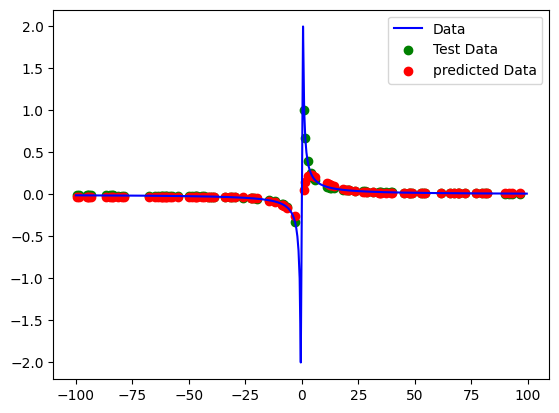

In [45]:
plt.plot(X,Y,c="b",label="Data")
plt.scatter(X_test,Y_test,c="g",label="Test Data")
plt.scatter(X_test,predicted_values,c="r",label="predicted Data")
plt.legend()

In [45]:
torch.save(obj=model_hb.state_dict(),f="/content/drive/MyDrive/models/PolynomialRegressionNeuralNetwork_hyperbola_model.pth")